In [1]:
from astropy.table import Table

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np

import pickle

In [7]:
def diff_voids(voids1, voids2):
    '''
    Compare two void catalogs (assumed to have been run on the same galaxy 
    catalog).  Retains only those voids that are not the same between the two 
    lists.
    
    
    PARAMETERS
    ==========
    
    voids1 : length-N astropy table
        VoidFinder output table containing a list of all the voids.
        
    voids2 : length-N astropy table
        VoidFinder output table containing a list of all the voids.  Presumably, 
        not the same list as in voids1.
        
        
    RETURNS
    =======
    
    unique1 : length-M astropy table
        VoidFinder output table containing a list of all the unique voids from 
        voids1.
        
    unique2 : length-M astropy table
        VoidFinder output table containing a list of all the unique voids from 
        voids2.
    '''
    
    
    ############################################################################
    # Determine which of the two tables is shorter
    #---------------------------------------------------------------------------
    N1 = len(voids1)
    N2 = len(voids2)
    
    if N2 < N1:
        short = voids2
        long = voids1
    else:
        short = voids1
        long = voids2
    ############################################################################
    
    
    ############################################################################
    # Find unique voids
    #---------------------------------------------------------------------------
    # List of unique void indices in the short list
    unique_idx_short = []
    
    for i in range(len(short)):
        
        ########################################################################
        # Is this void shared between the two tables?
        #-----------------------------------------------------------------------
        # Distance between the center of this void and the center of every void 
        # in the long list
        separation = (long['x'] - short['x'][i])**2 \
                     + (long['y'] - short['y'][i])**2 \
                     + (long['z'] - short['z'][i])**2
        
        unique_boolean = np.sqrt(separation) <= 0.1
        
        if sum(unique_boolean) == 0:
            # This void is unique!
            unique_idx_short.append(i)
            
        else:
            # This void is not unique, so we will remove all overlaps from the 
            # long catalog.
            long.remove_rows(unique_boolean)
        ########################################################################
    ############################################################################
    
    
    ############################################################################
    # Build output arrays
    #---------------------------------------------------------------------------
    if N2 < N1:
        unique1 = long
        unique2 = short[unique_idx_short]
    else:
        unique1 = short[unique_idx_short]
        unique2 = long
    ############################################################################
    
    return unique1, unique2
            

# Constants and conversions

In [8]:
RtoD = 180/np.pi

# Survey mask

In [9]:
mask_filename = '../../data/SDSS/dr7_mask.pickle'

In [10]:
temp_infile = open(mask_filename, 'rb')
mask_resolution, mask = pickle.load(temp_infile)
temp_infile.close()

# VoidFinder output files

In [11]:
all_cell_search_filename = '../../data/SDSS/vollim_dr7_cbp_102709_all_cells_comoving_maximal.txt'
empty_cell_search_filename = '../../data/SDSS/vollim_dr7_cbp_102709_empty_cells_only_comoving_maximal.txt'

In [12]:
all_cell_search_maximals = Table.read(all_cell_search_filename, 
                                      format='ascii.commented_header')
empty_cell_search_maximals = Table.read(empty_cell_search_filename, 
                                        format='ascii.commented_header')

# Unique voids

In [13]:
all_cell_unique_maximals, empty_cell_unique_maximals = diff_voids(all_cell_search_maximals,
                                                                  empty_cell_search_maximals)

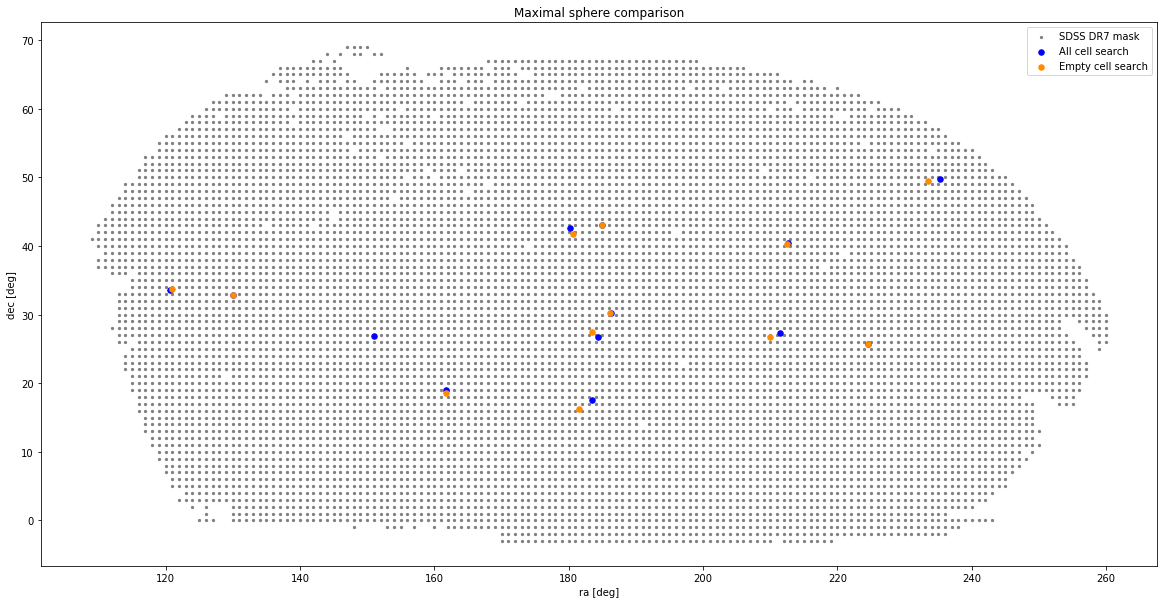

In [14]:
plt.figure(figsize=(20,10))

plt.scatter(mask[0], mask[1], s=5, c='gray', label='SDSS DR7 mask')
plt.scatter(all_cell_unique_maximals['ra'], all_cell_unique_maximals['dec'], 
            s=30, c='b', label='All cell search')
plt.scatter(empty_cell_unique_maximals['ra'], empty_cell_unique_maximals['dec'], 
            s=30, c='darkorange', label='Empty cell search')

plt.title('Maximal sphere comparison')
plt.xlabel('ra [deg]')
plt.ylabel('dec [deg]')

plt.legend()

In [17]:
all_cell_unique_maximals

x,y,z,radius,flag,r,ra,dec
float64,float64,float64,float64,int64,float64,float64,float64
-62.45731516824586,105.32516069893855,81.35052854803052,12.070308731806623,410,147.0109322102501,120.66773756118323,33.598091394341196
-88.53728245128468,-127.44489942409277,183.63776674193434,11.951978640991662,432,240.42437926932612,235.21189395939516,49.80095282455733
-162.72663727864128,53.914992784396375,58.83060970911861,11.569965376345214,502,181.23969092255328,161.66880579899137,18.941411741211844
-143.73730420177966,170.94954520617213,144.25633188982297,11.360359014156582,530,265.8835250926593,130.05769751609904,32.85771202955882
-245.14035519758255,-26.885250696447866,143.41811256459098,11.142978695894625,580,285.28120418807384,186.25877975805355,30.180476595763118
-47.33698782816491,-28.892638185836343,28.6193765291594,11.120941871303984,586,62.40708029462107,211.3982516760184,27.296277485504408
-176.87153973804234,-0.5250031495286013,162.66754490299968,11.091591704844216,591,240.30095164685122,180.17006905916733,42.60440710759143
-93.12877587224239,-8.014244162662344,87.24333957056612,11.026460029119534,599,127.86163343390476,184.91849992479177,43.025687262688095
-187.02148849494577,-119.83058440724948,188.76593628666168,10.490927119832822,710,291.49439929512897,212.64897190666917,40.359390006609914


In [18]:
empty_cell_unique_maximals

x,y,z,radius,flag,r,ra,dec
float64,float64,float64,float64,int64,float64,float64,float64
-62.879120145630175,104.58995209116351,81.44908647282818,11.9864432262676,424,146.72012648569628,121.01414039374237,33.719830201025864
-92.12228291775266,-124.55969292960971,181.23694797293544,11.898624419533288,441,238.42915808105693,233.51398494979833,49.47558283200845
-162.90391113194744,53.68160936498691,57.68659552151045,11.401478350003403,524,180.96171625225824,161.76143484601602,18.58903343036398
-143.5106132190009,170.51282989550666,143.77480218305982,11.237378472801014,563,265.21899443336565,130.08534525693887,32.82660307379395
-245.25558023182782,-26.609660696633775,143.6471985665722,11.11348185436166,585,285.46959791414696,186.19223696605448,30.21168088711608
-47.191708693860505,-27.14846674413078,27.499373201512824,11.050348326271912,593,60.994361563012085,209.91097574471604,26.798300866805842
-93.13365539129556,-8.176992644859064,87.48093112652599,10.94401797907092,612,128.03770650094705,185.01761541292606,43.0976247207097
-179.470657652402,-2.07252763458482,160.36654684235904,10.533750800648672,702,240.6895130144318,180.6616224055872,41.78057882658182
-167.72068660439612,-164.86674327815194,112.98239829439211,10.297086453474451,749,260.9143424163317,224.50835515859563,25.659679506803343
